In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
league = 'Championship'
if league == 'Premier League':
    id = 91
    df = pd.read_html(f'https://fbref.com/en/comps/9/{league[0]}-{league[1]}-Stats', attrs = {"id" : f"results2023-2024{id}_overall"})[0]
else:
    id = 101
    df = pd.read_html(f'https://fbref.com/en/comps/10/{league}-Stats', attrs = {"id" : f"results2023-2024{id}_overall"})[0]

In [3]:
df_xG_GF = df[['Squad', 'xG','xGA','GF','GA']]
df_xG_GF.rename(columns={'Squad':'Team'}, inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_13772\1053559381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xG_GF.rename(columns={'Squad':'Team'}, inplace=True)


In [4]:
df_PSxG = pd.read_html(f'https://fbref.com/en/comps/10/{league}-Stats', attrs = {"id" : "stats_squads_keeper_adv_against"})[0]

In [5]:
df_PSxGA = pd.read_html(f'https://fbref.com/en/comps/10/{league}-Stats', attrs = {"id" : "stats_squads_keeper_adv_for"})[0]

In [6]:
df_PSxG.columns = ['_'.join(col).strip() for col in df_PSxG.columns.values]
df_PSxGA.columns = ['_'.join(col).strip() for col in df_PSxGA.columns.values]

In [7]:
df_PSxG

,Unnamed: 0_level_0_Squad,Unnamed: 1_level_0_# Pl,Unnamed: 2_level_0_90s,Goals_GA,Goals_PKA,Goals_FK,Goals_CK,Goals_OG,Expected_PSxG,Expected_PSxG/SoT,...,Passes_AvgLen,Goal Kicks_Att,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_#OPA/90,Sweeper_AvgDist
0,vs Birmingham City,2,46.0,50,2,2,5,2,50.5,0.28,...,32.4,350,48.3,39.8,505,28,5.5,66,1.43,16.5
1,vs Blackburn,2,46.0,60,0,0,4,1,59.7,0.31,...,33.7,362,47.5,38.4,493,36,7.3,59,1.28,16.6
2,vs Bristol City,1,46.0,53,7,1,9,1,52.1,0.28,...,31.1,359,38.2,33.7,630,36,5.7,93,2.02,16.6
3,vs Cardiff City,3,46.0,53,2,1,17,5,43.4,0.24,...,29.6,331,36.6,33.5,564,32,5.7,66,1.43,17.5
4,vs Coventry City,2,46.0,70,3,2,9,4,62.9,0.32,...,33.7,375,47.7,38.2,674,40,5.9,51,1.11,13.4
5,vs Huddersfield,3,46.0,48,1,0,8,2,43.7,0.27,...,33.4,360,45.0,36.8,712,43,6.0,77,1.67,15.8
6,vs Hull City,2,46.0,68,4,1,9,0,65.8,0.27,...,32.7,353,49.0,40.2,577,31,5.4,77,1.67,16.8
7,vs Ipswich Town,2,46.0,92,2,0,12,4,76.7,0.30,...,34.0,375,49.1,40.3,676,60,8.9,46,1.00,12.9
8,vs Leeds United,3,46.0,81,7,0,7,3,81.1,0.32,...,36.5,385,54.5,41.6,585,19,3.2,49,1.07,15.5
9,vs Leicester City,2,46.0,89,12,1,6,1,89.6,0.34,...,33.0,459,44.0,37.3,601,34,5.7,55,1.20,15.1


In [8]:
df_PSxG = df_PSxG[['Unnamed: 0_level_0_Squad', 'Expected_PSxG']]
df_PSxG.rename(columns={'Unnamed: 0_level_0_Squad': 'Team', 'Expected_PSxG' : 'PSxG'}, inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_13772\428416096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSxG.rename(columns={'Unnamed: 0_level_0_Squad': 'Team', 'Expected_PSxG' : 'PSxG'}, inplace=True)


In [9]:
df_PSxG['Team'] = df_PSxG['Team'].str.split('vs').str[1]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_13772\2568517509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSxG['Team'] = df_PSxG['Team'].str.split('vs').str[1]


In [10]:
df_PSxGA = df_PSxGA[['Unnamed: 0_level_0_Squad', 'Expected_PSxG']]
df_PSxGA.rename(columns={'Unnamed: 0_level_0_Squad': 'Team', 'Expected_PSxG' : 'PSxGA'}, inplace=True)

In [11]:
df_PSxG['Team'] = df_PSxG['Team'].str.strip()

C:\Users\dmsta\AppData\Local\Temp\ipykernel_13772\501252023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSxG['Team'] = df_PSxG['Team'].str.strip()


In [12]:
df_PSxG = df_PSxG.merge(df_PSxGA, on='Team')

In [13]:
df = df_xG_GF.merge(df_PSxG, on='Team')

In [14]:
df['Finishing Skill %'] = ((df['PSxG'] - df['xG'])/df['xG']) * 100
df['Finishing Skill %'] = df['Finishing Skill %'].round(2)

In [15]:
df['Finishing Luck %'] = ((df['GF'] - df['PSxG'])/df['PSxG']) * 100
df['Finishing Luck %'] = df['Finishing Luck %'].round(2)

In [16]:
df['Opp Finishing Skill %'] = ((df['PSxGA'] - df['xGA'])/df['xGA']) * 100
df['Opp Finishing Skill %'] = df['Opp Finishing Skill %'].round(2)

In [17]:
df['Opp Finishing Luck %'] = ((df['GA'] - df['PSxGA'])/df['PSxGA']) * 100
df['Opp Finishing Luck %'] = df['Opp Finishing Luck %'].round(2)

In [18]:
df

,Team,xG,xGA,GF,GA,PSxG,PSxGA,Finishing Skill %,Finishing Luck %,Opp Finishing Skill %,Opp Finishing Luck %
0,Leicester City,84.9,42.7,89,39,89.6,46.2,5.54,-0.67,8.20,-15.58
1,Ipswich Town,74.0,46.7,90,57,76.7,52.2,3.65,17.34,11.78,9.20
2,Leeds United,79.5,38.0,80,41,81.1,36.8,2.01,-1.36,-3.16,11.41
3,Southampton,79.8,49.0,85,62,88.6,50.2,11.03,-4.06,2.45,23.51
4,Norwich City,63.0,63.4,79,63,65.0,63.7,3.17,21.54,0.47,-1.10
5,West Brom,60.1,50.3,67,47,59.8,46.9,-0.50,12.04,-6.76,0.21
6,Hull City,57.2,51.9,68,59,65.8,44.7,15.03,3.34,-13.87,31.99
7,Middlesbrough,68.3,53.8,68,61,72.0,57.4,5.42,-5.56,6.69,6.27
8,Coventry City,63.8,55.9,69,57,62.9,52.1,-1.41,9.70,-6.80,9.40
9,Preston,40.7,60.2,56,64,48.4,66.0,18.92,15.70,9.63,-3.03


In [19]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [20]:
df = pd.DataFrame(df)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_13772\1070327373.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


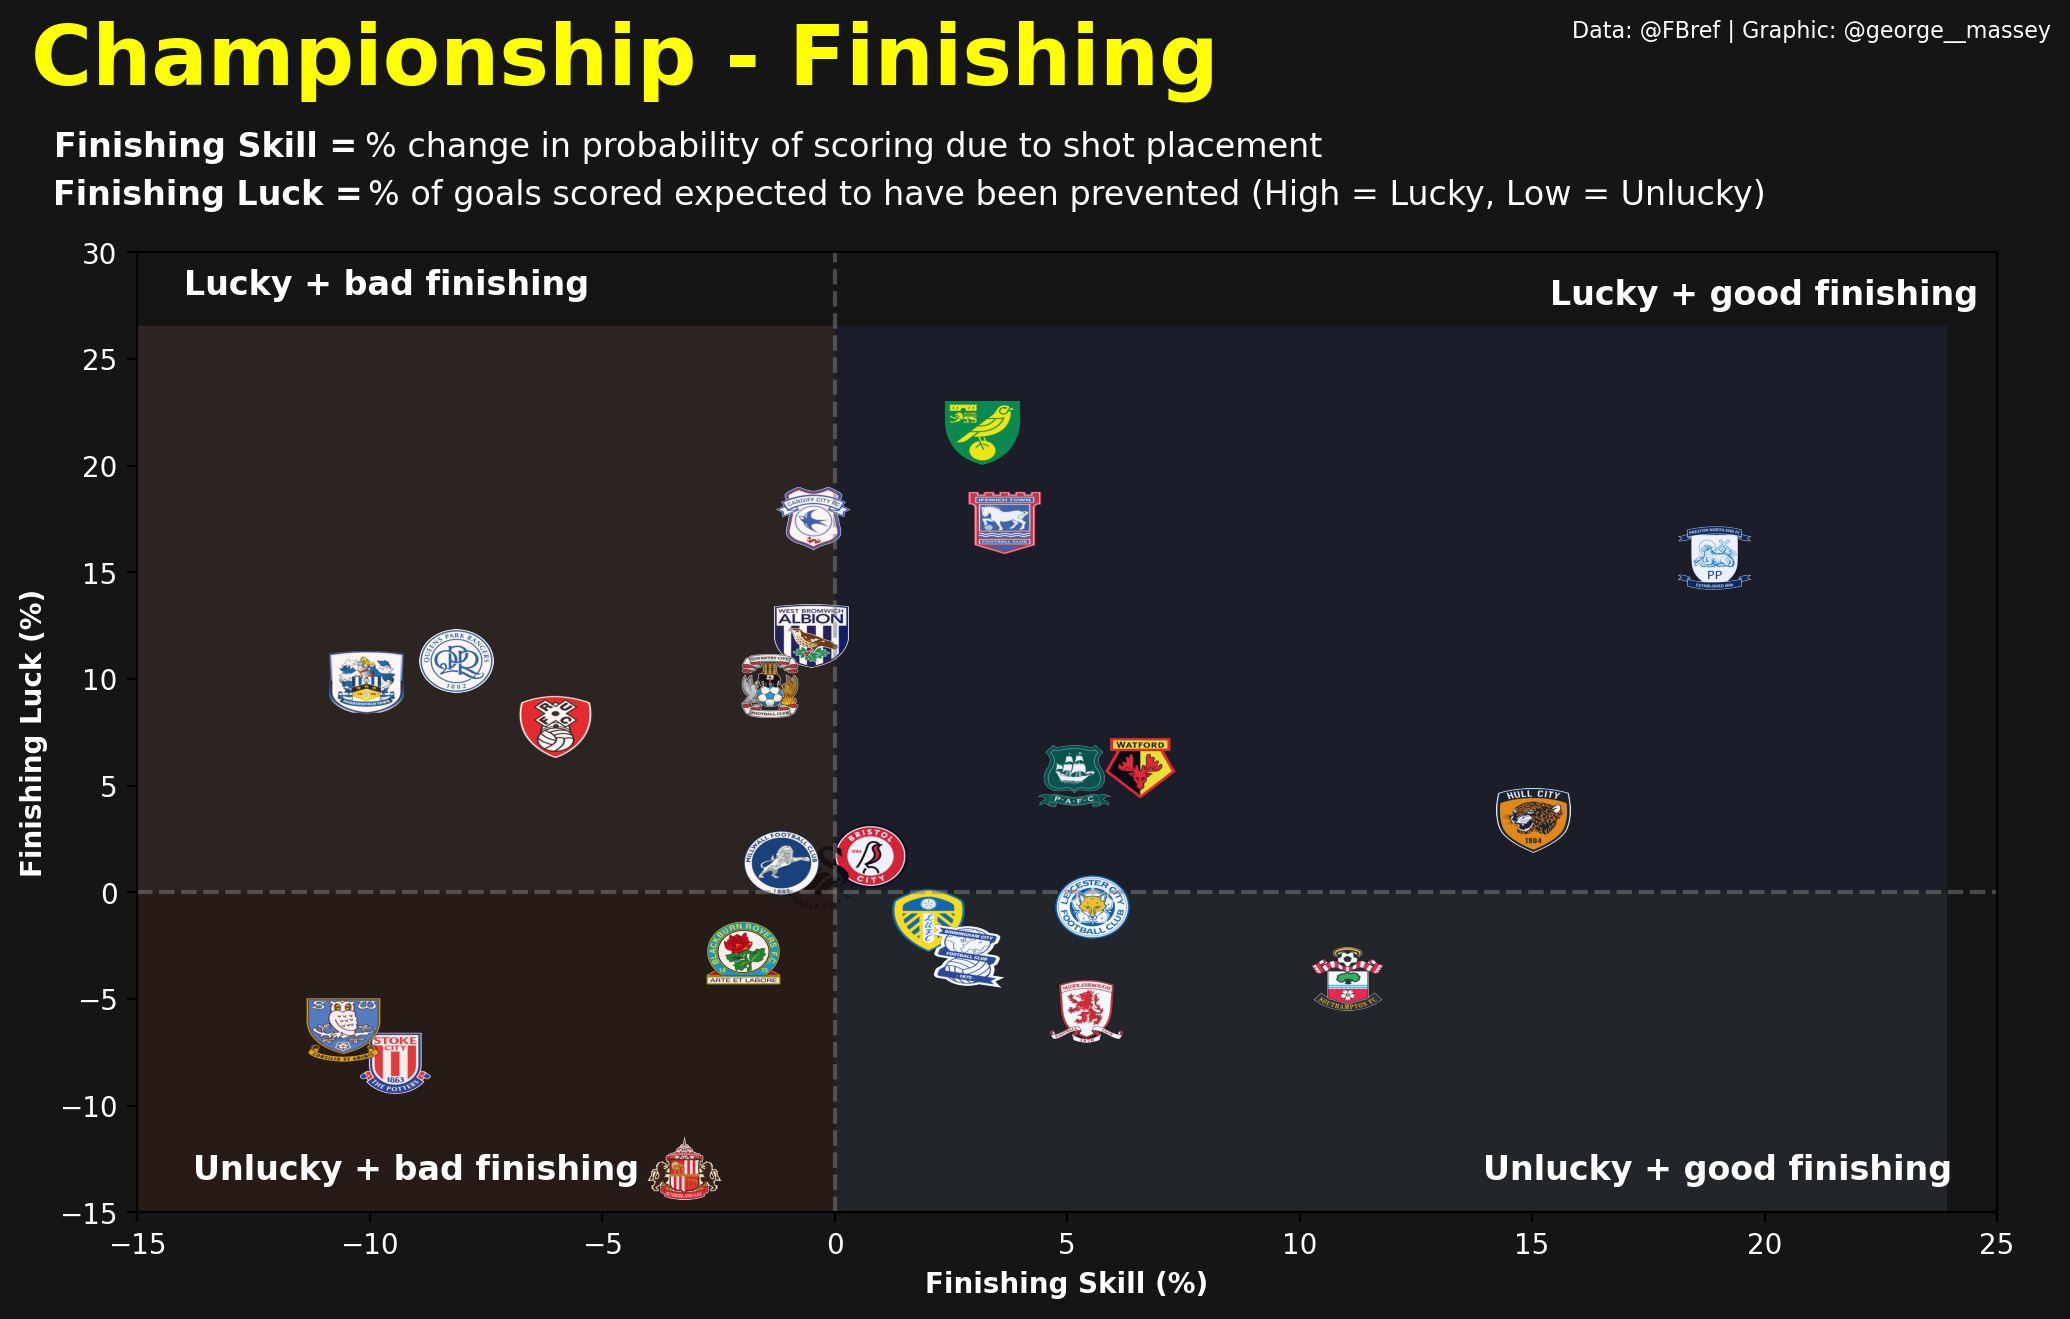

In [21]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 8), dpi=200, facecolor='#141514')  # Set the facecolor to #141514

for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    plt.imshow(badge, extent=(team['Finishing Skill %']-0.8, team['Finishing Skill %']+0.8, team['Finishing Luck %']-1.5, team['Finishing Luck %']+1.5), aspect='auto', alpha=1)

# Add labels and title
plt.xlabel('Finishing Skill (%)', color='white',weight='bold')  # Set the xlabel color to white
plt.ylabel('Finishing Luck (%)', color='white',weight='bold')  # Set the ylabel color to white
plt.yticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30], color='white')  # Set the yticks color to white
plt.xticks([-15,-10,-5,0,5,10,15,20,25],color='white')  # Set the xticks color to white

# Draw a line from the y-axis at the average value
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
plt.axvline(0, color='grey', linestyle='--', alpha=0.5)

# Set the colors for each quadrant
#colors = ['green', 'yellow', 'blue', 'red']
import matplotlib.cm as cm
# Set the colors for each quadrant using a colormap
cmap = cm.get_cmap('coolwarm')
colors = [cmap(0.1), cmap(0.3), cmap(0.7), cmap(0.9)]

# Create the rectangles
rect1 = patches.Rectangle((0, 0), df['Finishing Skill %'].max()+5, df['Finishing Luck %'].max()+5, facecolor=colors[0], alpha=0.1)
rect2 = patches.Rectangle((0, 0), df['Finishing Skill %'].max()+5, df['Finishing Luck %'].min()-10, facecolor=colors[1], alpha=0.1)
rect3 = patches.Rectangle((0, 0), df['Finishing Skill %'].min()-5, df['Finishing Luck %'].max()+5, facecolor=colors[2], alpha=0.1)
rect4 = patches.Rectangle((0, 0), df['Finishing Skill %'].min()-10, df['Finishing Luck %'].min()-10, facecolor=colors[3], alpha=0.1)

# Add the rectangles to the plot
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)

# Set the ticks color to white
plt.xticks(color='white')
plt.yticks(color='white')

# Set the plot background color to #141514
plt.gca().set_facecolor('#141514')
# Add text box in each quadrant

plt.text(-14, 28, 'Lucky + bad finishing', color='white', fontsize=12, weight='bold')
plt.text(-9, -13, 'Unlucky + bad finishing', color='white', fontsize=12, weight='bold', ha='center', va='center')
plt.text(19, -13, 'Unlucky + good finishing', color='white', fontsize=12, weight='bold', ha='center', va='center')
plt.text(20, 28, 'Lucky + good finishing', color='white', fontsize=12, weight='bold', ha='center', va='center')
#plt.suptitle(f'{league} 23/24 Finishing Skill vs Finishing Luck', color='white', fontsize=16, weight='bold')  # Set the title color to white
#plt.title('Data from FBref.com', color='white', fontsize=8, weight='bold')  # Set the suptitle color to white
plt.subplots_adjust(top=0.85, bottom=0.25)

# Add text outside of the plot
plt.text(0.262, 1.2, f'{league} - Finishing', color='yellow', fontsize=30, weight='bold', ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.9, 1.23, 'Data: @FBref | Graphic: @george__massey', color='white', fontsize=8,ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.04, 1.11, 'Finishing Skill = ', weight = 'bold', color='white', fontsize=12, ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.38, 1.11, '% change in probability of scoring due to shot placement', color='white', fontsize=12, ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.041, 1.06, 'Finishing Luck = ', weight = 'bold', color='white', fontsize=12, ha='center', va='center',transform=plt.gca().transAxes)
plt.text(0.5, 1.06, '% of goals scored expected to have been prevented (High = Lucky, Low = Unlucky)', color='white', fontsize=12, ha='center', va='center',transform=plt.gca().transAxes)

plt.show()